In [38]:
import wradlib as wrl
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

bin_file_name_prefix = "raa01-yw2017.002_10000-"
img_file_name_prefix = "scaled_"

# Subdirectories with years
image_dir="/data/Radarbilder_DWD/minutely/"
data_dir="/data_hdd/Radardaten/minutely/uncompressed/"

year=2016
month=8
day_begin=12
day_end=19

In [39]:
def get_filename_prefix(year, month, day):
    date_string_w_full_year = "{:4d}{:02d}{:02d}".format(year, month, day)
    return date_string_w_full_year[2:]

In [40]:
def read_data_from_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file(radfile)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    return data

In [41]:
def read_image_gray(image_file):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [42]:
def get_all_binary_data_in_range(year, month, day_begin, day_end):
    os.environ["WRADLIB_DATA"] = data_dir + str(year) + "/"
    os.chdir(data_dir + str(year) + "/")
    bin_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = bin_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            try:
                if len(bin_data)==0:
                    bin_data=read_data_from_radolan(file)
                else:
                    data = read_data_from_radolan(file)
                    np.concatenate((bin_data, data))
            except OSError as e:
                print("Could not read file: " + str(e))
    return bin_data

def get_all_image_data_in_range(year, month, day_begin, day_end):
    os.chdir(image_dir + str(year) + "/")
    img_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = img_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            # Read image, append to data
            if len(img_data) == 0:
                img_data = read_image_gray(file)
            else:
                image = read_image_gray(file)
                np.concatenate((img_data, image))
    return img_data

In [43]:
bin_data = get_all_binary_data_in_range(year, month, day_begin, day_end)
print(type(bin_data))
print(len(bin_data))
print("{} / {}".format(bin_data.min(), bin_data.max()))

img_data = get_all_image_data_in_range(year, month, day_begin, day_end)
print(type(img_data))
print(len(img_data))
print("{} / {}".format(img_data.min(), img_data.max()))

<class 'numpy.ma.core.MaskedArray'>
1100
0.0 / 0.13
<class 'numpy.ndarray'>
1100
0 / 100


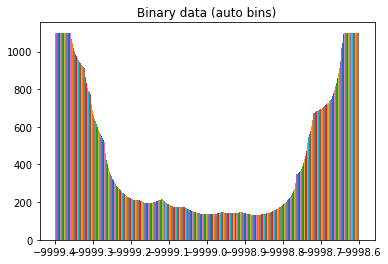

In [44]:
#hist, bin_edges = np.histogram(bin_data, density=True)
plt.hist(bin_data, bins='auto', histtype='bar')  # arguments are passed to np.histogram
plt.title("Binary data (auto bins)")
plt.show()

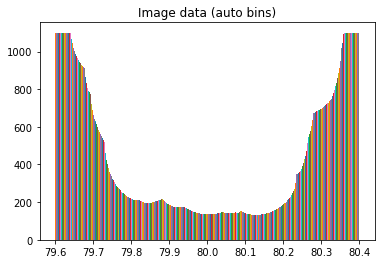

In [45]:
plt.hist(img_data, bins='auto')  # arguments are passed to np.histogram
plt.title("Image data (auto bins)")
plt.show()

### Edits:
* eindimensionales Histogramm ist oft einfacher zu interpretieren:
    -> unterschiede werden sichtbar, aber auch die Masked eigenschaft ist eher negativ zum Auswerten des Arrays, daher clipping
* Forschleife die gesammtes Bild durchsucht macht unterschiedliche Wertebereiche nochmal sichtbar.
* Schlussendlich gilt noch zu klären, ob überhaupt das selbe Bild verglichen wird, imshow sieht durchaus sehr unterschiedlich aus
    

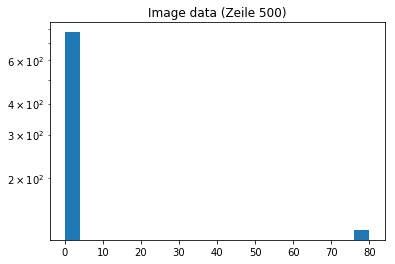

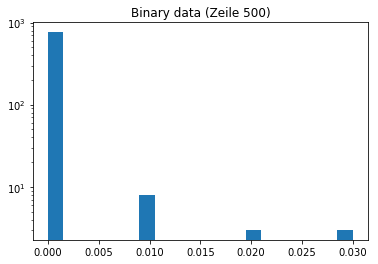

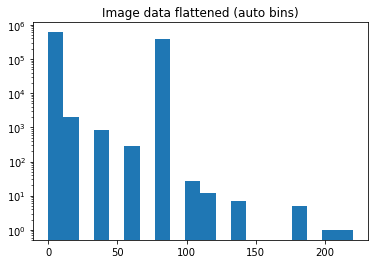

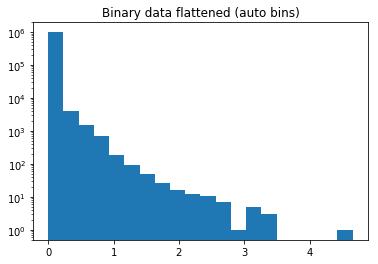

[80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 80 80 80 80 80 80 80 80 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [36]:
plt.hist(img_data[500], bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Image data (Zeile 500)")
plt.show()
plt.hist(bin_data[500], bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Binary data (Zeile 500)")
plt.show()
###
print("\n\n\n")
plt.hist(img_data.flatten(), bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Image data flattened (auto bins)")
plt.show()
clipped_bin = bin_data.flatten()
clipped_bin[clipped_bin<-1000] = 0
plt.hist(clipped_bin, bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Binary data flattened (auto bins)")
plt.show()
print(img_data[500])

In [14]:
img_a = {}
for i in range(1100):
    for j in range(900):
        if img_data[i][j] in img_a:
            img_a[img_data[i][j]] += 1
            continue
        img_a[img_data[i][j]] = 1
print(img_a)

bin_a = []
for i in range(1100):
    for j in range(900):
        if bin_data[i][j] in bin_a:
            continue
        
        bin_a.append(bin_data[i][j])
print(bin_a)
print(len(bin_a))


{80: 380736, 0: 606112, 20: 2007, 40: 816, 60: 276, 100: 27, 120: 12, 140: 7, 180: 5, 220: 1, 200: 1}
[masked, 0.0, 0.01, 0.03, 0.09, 0.05, 0.14, 0.02, 0.07, 0.18, 0.15, 0.1, 0.37, 0.23, 0.12, 0.28, 0.3, 0.21, 0.34, 0.2, 0.27, 0.17, 0.31, 0.4, 0.7000000000000001, 0.47000000000000003, 0.11, 0.25, 0.43, 0.56, 0.51, 0.58, 0.33, 0.62, 0.46, 0.36, 0.55, 0.5, 0.38, 0.44, 0.49, 0.41000000000000003, 0.54, 0.16, 0.13, 0.08, 0.06, 0.04, 0.9500000000000001, 0.35000000000000003, 0.8300000000000001, 0.66, 0.76, 0.5700000000000001, 0.22, 0.26, 0.52, 0.93, 0.48, 0.8, 0.88, 0.45, 0.42, 0.32, 0.24, 0.78, 0.53, 0.19, 0.65, 0.87, 0.29, 0.63, 0.64, 0.81, 0.71, 0.68, 1.35, 0.8200000000000001, 0.92, 0.89, 0.77, 0.59, 1.51, 1.76, 1.42, 0.72, 1.55, 1.36, 0.61, 0.79, 0.39, 0.73, 1.07, 2.58, 1.03, 1.1, 1.0, 1.77, 1.85, 3.15, 2.7, 2.91, 2.48, 2.2600000000000002, 1.95, 1.53, 3.48, 4.66, 2.52, 1.46, 0.67, 1.7, 1.67, 2.71, 2.32, 1.72, 1.59, 1.08, 0.6900000000000001, 2.35, 3.24, 3.39, 2.13, 2.65, 1.8800000000000001,

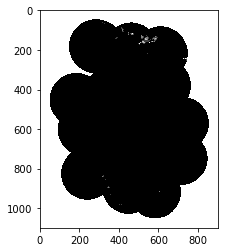

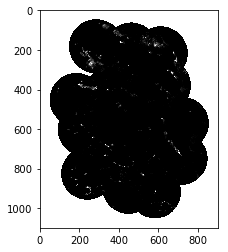

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img_data, cmap="gray", vmax=80)
plt.show()
plt.imshow(bin_data, cmap="gray", vmax=1)
plt.show()

